### Supermaarket sotuvlari dataseti ustida ish olibbboramiz

#### Birinchi navbatda datasetimizni uqib olamiz va tekshiramiz

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('supermarket_sales.csv')

In [121]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [122]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [123]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Rasmlarimizaga styl beramiz va <b>"Branch"</b>-lar buyicha <b>"Unit price"</b>-ni kuramiz

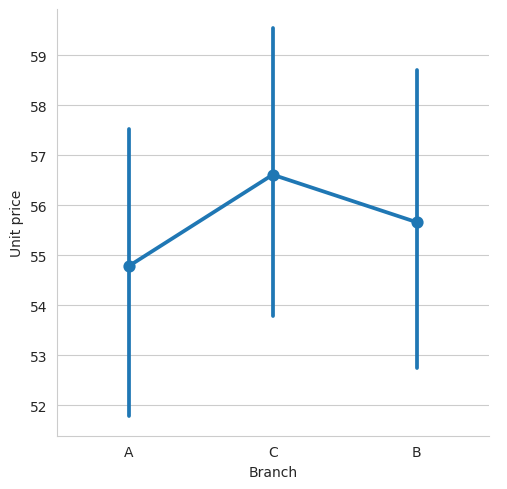

In [125]:
sns.set_style('whitegrid')
sns.catplot(x='Branch', 
            y='Unit price', 
            data=df, 
            kind='point')

#### <b>"Gender"</b> ustuni buyicha ajratamiz va <b>"City"</b> ustuni buyicha <b>"Unit price"</b>-ni kuramiz

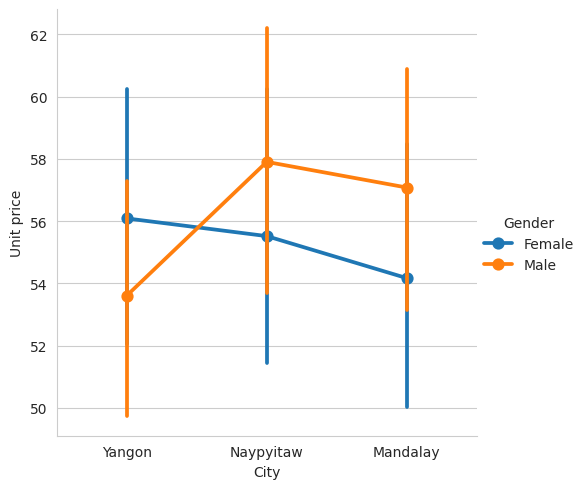

In [126]:
sns.catplot(x='City', 
            y='Unit price', 
            data=df, 
            kind='point',
            hue='Gender')

#### <b>"Gender"</b> ustuni buyicha ajratamiz va <b>"Branch"</b> ustuni buyicha <b>"Unit price"</b>-ni kuramiz

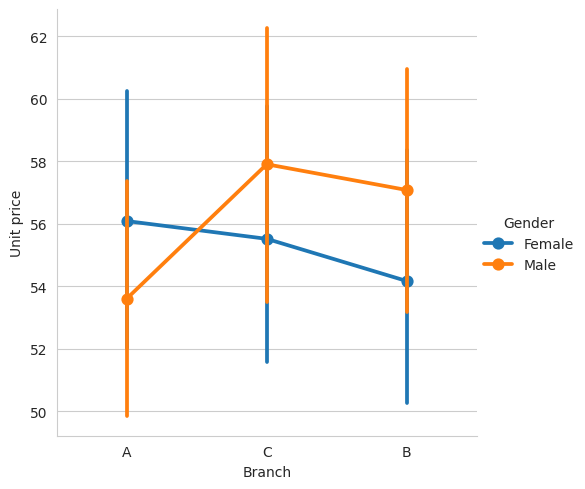

In [127]:
sns.catplot(x='Branch', 
            y='Unit price', 
            data=df, 
            kind='point',
            hue='Gender')

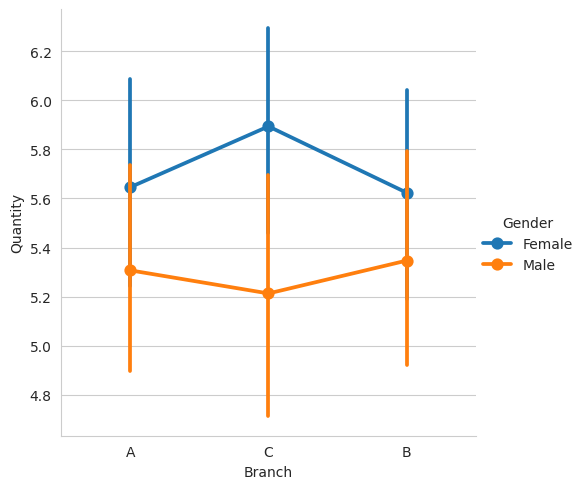

In [128]:
sns.catplot(x='Branch', 
            y='Quantity', 
            data=df, 
            kind='point',
            hue='Gender')

#### <b>"Total"</b> buyicha kuramiz

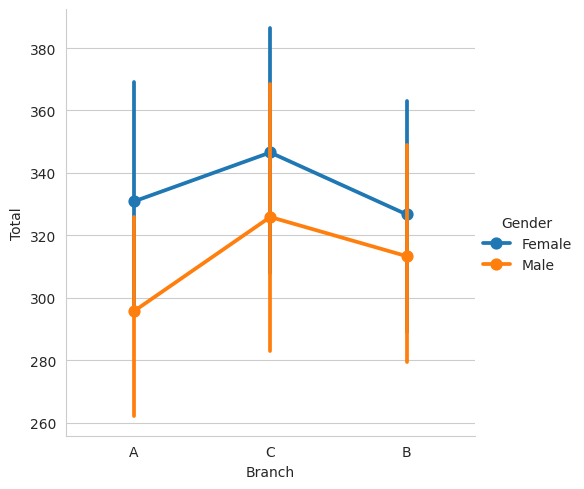

In [129]:
sns.catplot(x='Branch', 
            y='Total', 
            data=df, 
            kind='point',
            hue='Gender')

#### <b>"Product line"</b> buyicha umumiy <i>'mean', 'max', 'min', 'std', 'sum'</i> larni kuramiz

In [130]:
product_line = df.groupby('Product line')['Total'].agg(['mean', 'max', 'min', 'std', 'sum']).reset_index()

/tmp/ipykernel_60216/1963676308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Product line', y='sum', data=product_line.sort_values('sum'), palette='gist_rainbow_r')


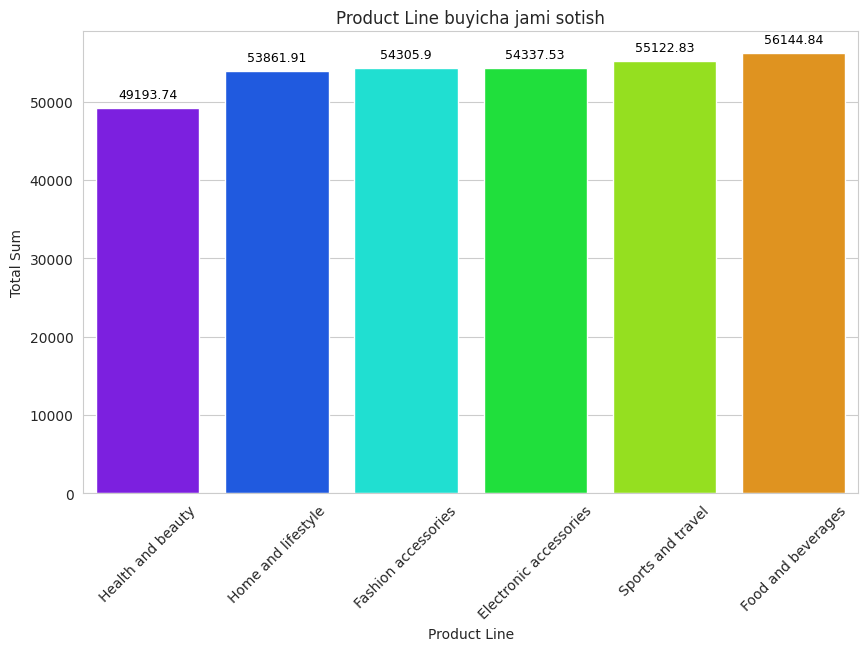

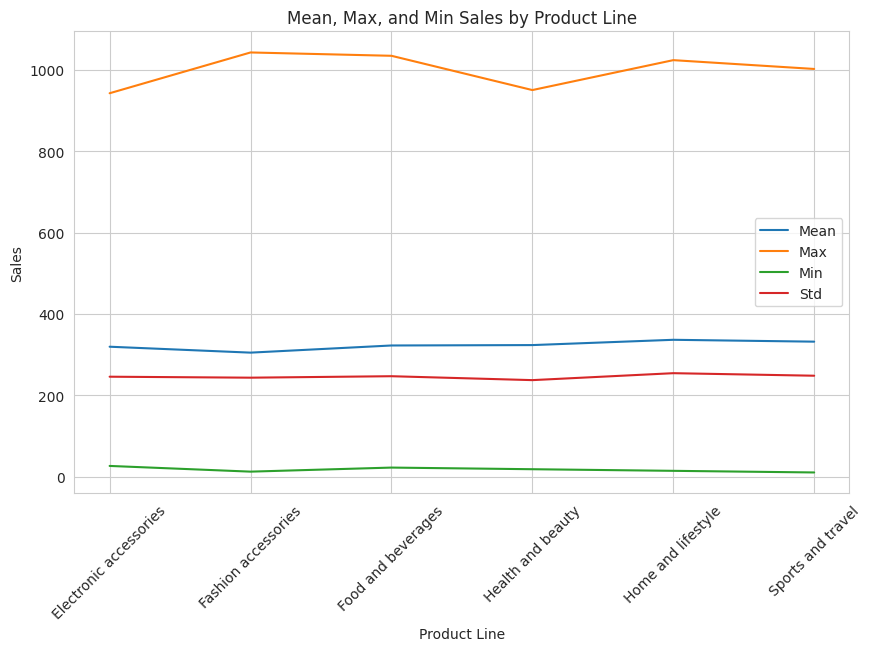

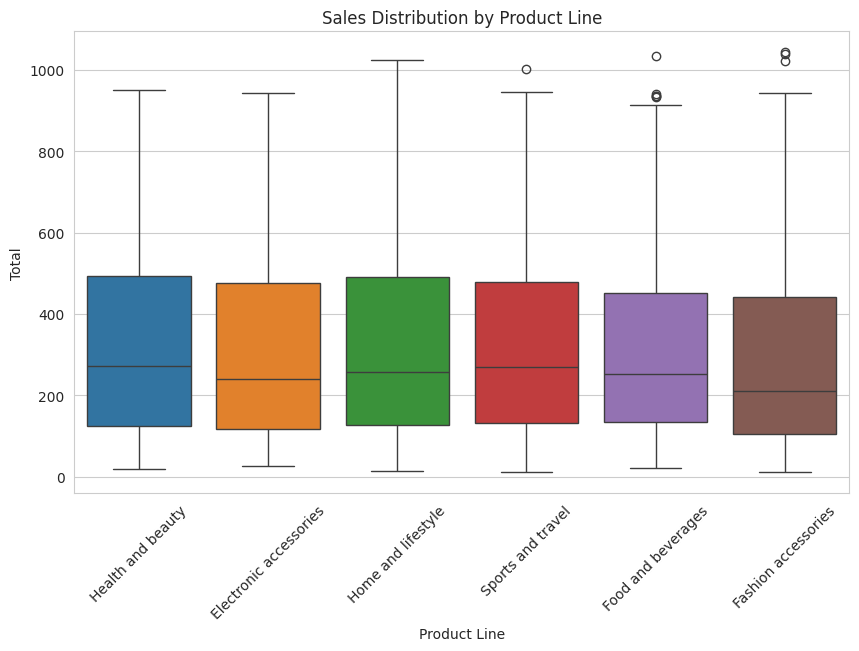

In [131]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Product line', y='sum', data=product_line.sort_values('sum'), palette='gist_rainbow_r')
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
plt.title('Product Line buyicha jami sotish')
plt.xlabel('Product Line')
plt.ylabel('Total Sum')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(product_line['Product line'], product_line['mean'], label='Mean')
plt.plot(product_line['Product line'], product_line['max'], label='Max')
plt.plot(product_line['Product line'], product_line['min'], label='Min')
plt.plot(product_line['Product line'], product_line['std'], label='Std')
# plt.plot(product_line['Product line'], product_line['sum'], label='Sum')
plt.title('Mean, Max, and Min Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Total', data=df, hue='Product line')
plt.title('Sales Distribution by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

#### <b>"City"</b> ustuni buyicha foydalanuvchilar sonini kuramiz

([0, 1, 2],
 [Text(0, 0, 'Yangon'), Text(1, 0, 'Naypyitaw'), Text(2, 0, 'Mandalay')])

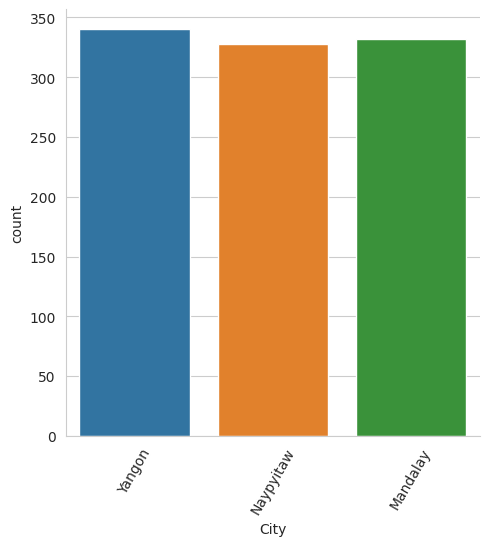

In [132]:
sns.catplot(x='City',
            data=df,
            kind='count',
            hue='City')
plt.xticks(rotation=60)

#### <b>"Customer type"</b> buyicha darajalarni <i>"Boxplot"</i> da kuramiz

Text(0.5, 0.98, 'Customer type')

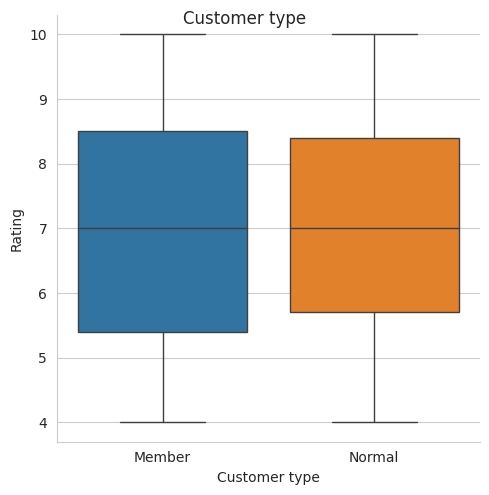

In [133]:
g = sns.catplot(x='Customer type', 
                y='Rating', 
                data=df,
                kind='box',
                hue='Customer type')
g.figure.suptitle("Customer type")

#### <b>"Gender"</b> buyicha ajratamiz

Text(0.5, 0.98, 'Customer type')

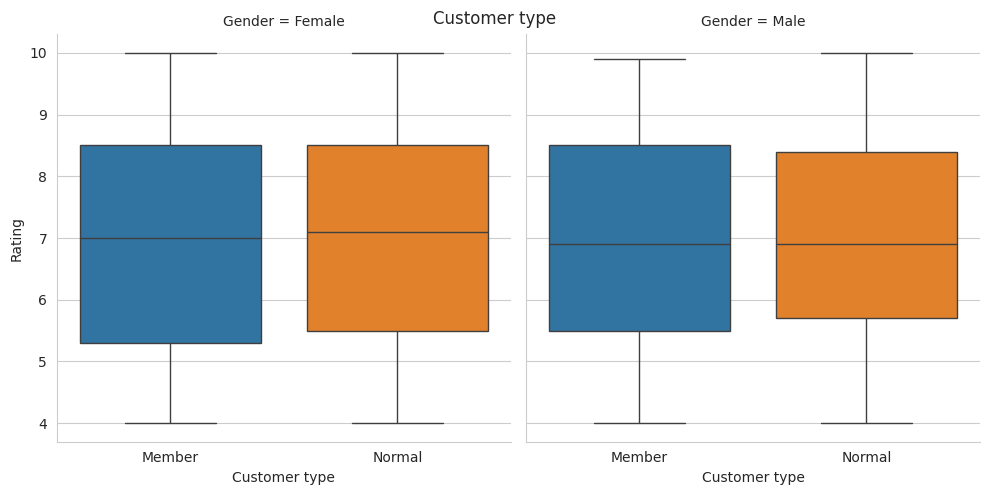

In [134]:
g = sns.catplot(x='Customer type',
                y='Rating', 
                data=df,
                kind='box',
                col='Gender',
                hue='Customer type')
g.figure.suptitle("Customer type")

#### <b>"Customer type"</b> buyicha <b>"Total"</b>-ni <i>"Boxplotda"</i>-da kuramiz va <b>"gender"</b> buyicha ajratamiz

Text(0.5, 0.98, 'Customer type')

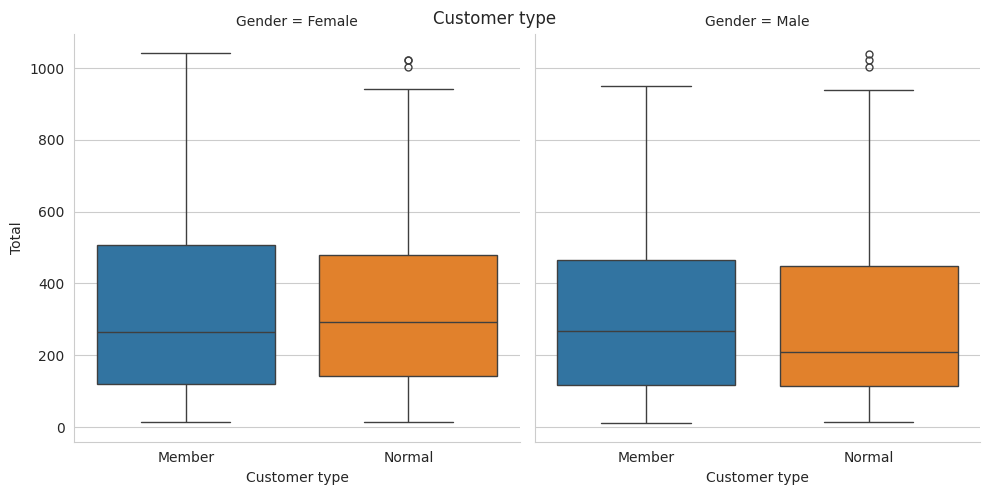

In [135]:
g = sns.catplot(x='Customer type', 
                y='Total', 
                data=df,
                kind='box',
                col='Gender',
                hue='Customer type')
g.figure.suptitle("Customer type")

#### <b>"Total"</b> buyicha userlar sonini kuramiz

<Axes: xlabel='Total', ylabel='Count'>

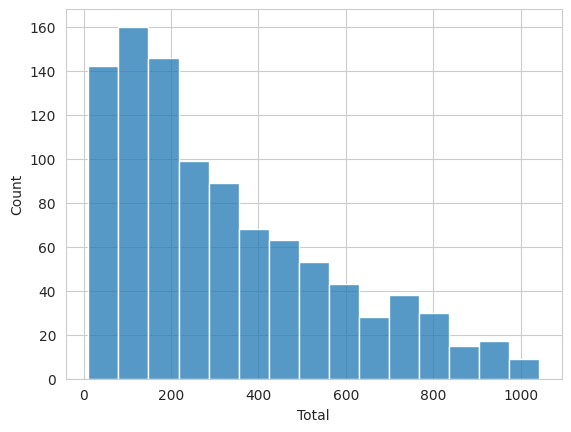

In [136]:
sns.histplot(df['Total'])

#### <b>"Total"</b> buyicha taqsimotni kuramiz

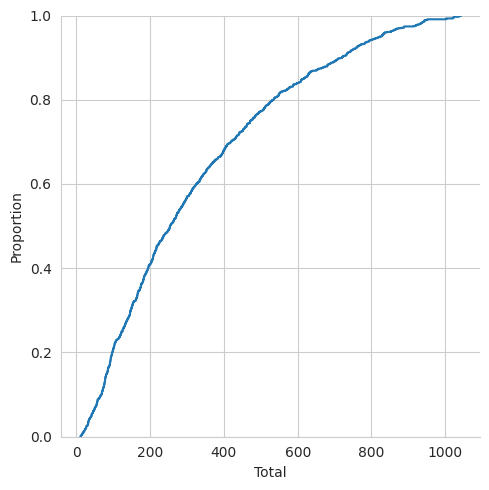

In [137]:
sns.displot(df['Total'], kind='ecdf')

<Axes: >

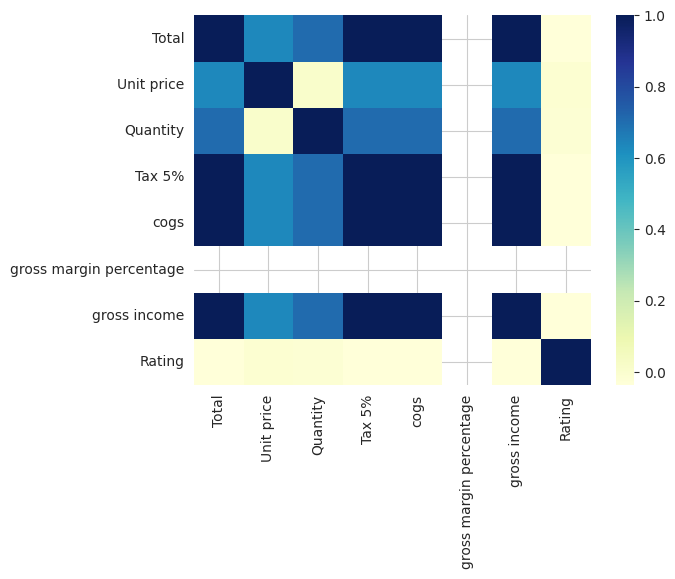

In [138]:
cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols.remove('Total')
cols.insert(0, 'Total')
sns.heatmap(df[cols].corr(), cmap='YlGnBu')

#### <b>"Time"</b> ustunidan <b>"hour"</b> ni ajratib olamiz va <b>"Total"</b> va <b>"hour"</b> bog'likligini kuramiz , <b>"Genderni"</b> ajratib kuramiz

/tmp/ipykernel_60216/1919462657.py:1: FutureWarning: using <function <lambda> at 0x7bdca577e7a0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['hour'] = df['Time'].agg(lambda x: int(x.split(':')[0]))


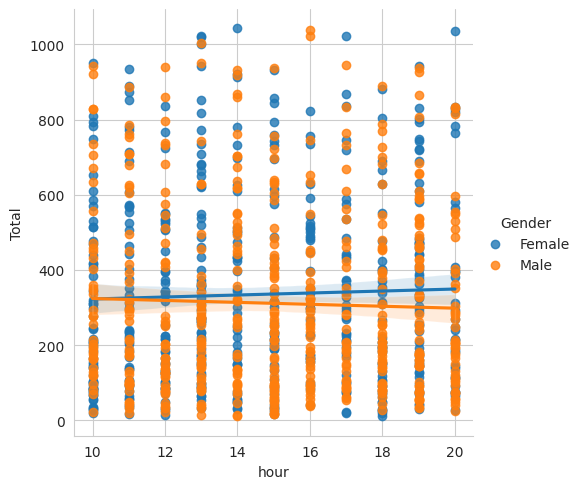

In [139]:
df['hour'] = df['Time'].agg(lambda x: int(x.split(':')[0]))
sns.lmplot(x='hour', y='Total', data=df, hue='Gender')

#### Har bir <b>"Branch"</b> buyicha kuramiz

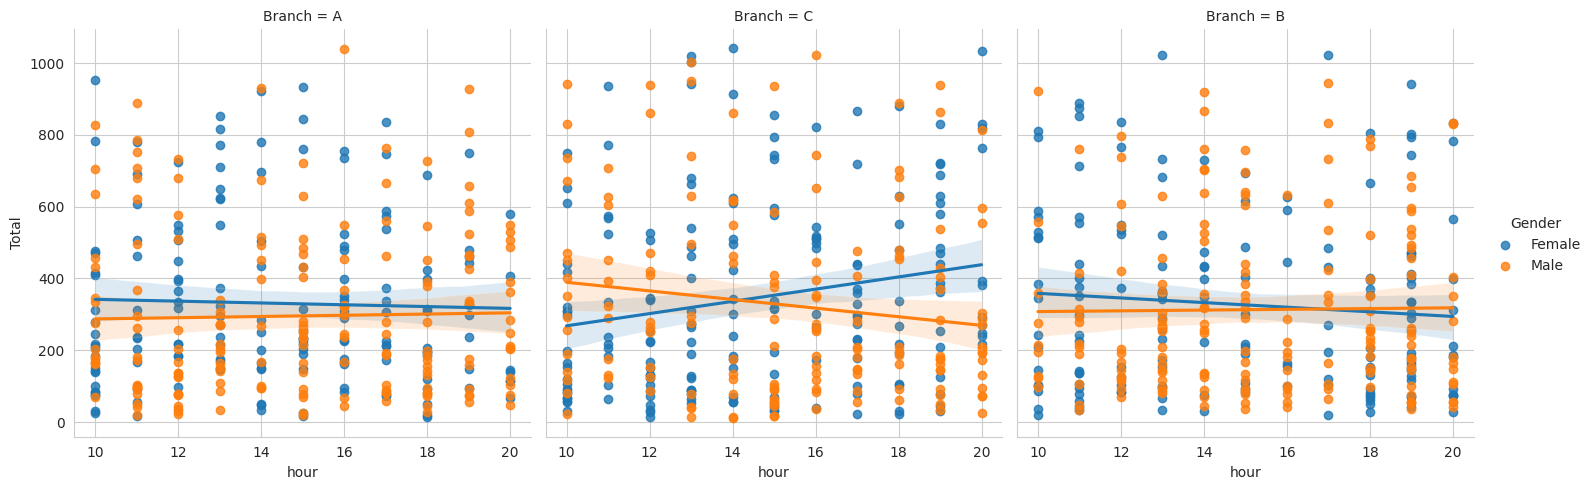

In [140]:
sns.lmplot(x='hour', y='Total', data=df, hue='Gender', col='Branch')

#### har bir <b>"City"</b> buyicha kuramiz

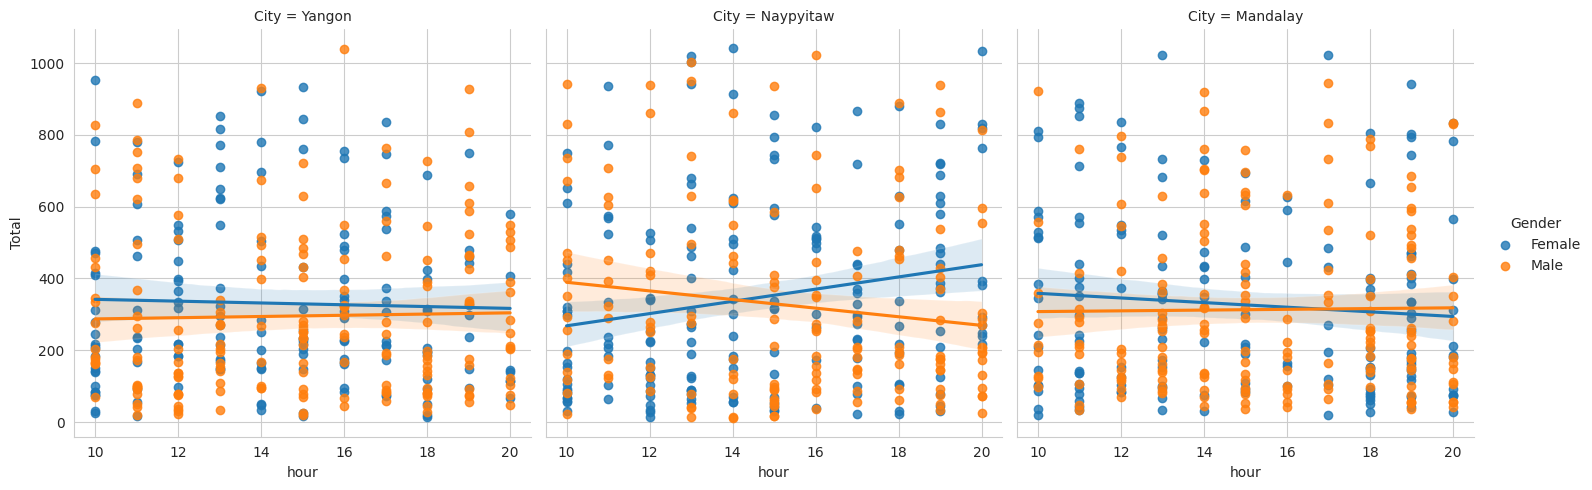

In [141]:
sns.lmplot(x='hour', y='Total', data=df, hue='Gender', col='City')

#### Har bir <b>"Product line"</b> buyicha ajratib kuramiz

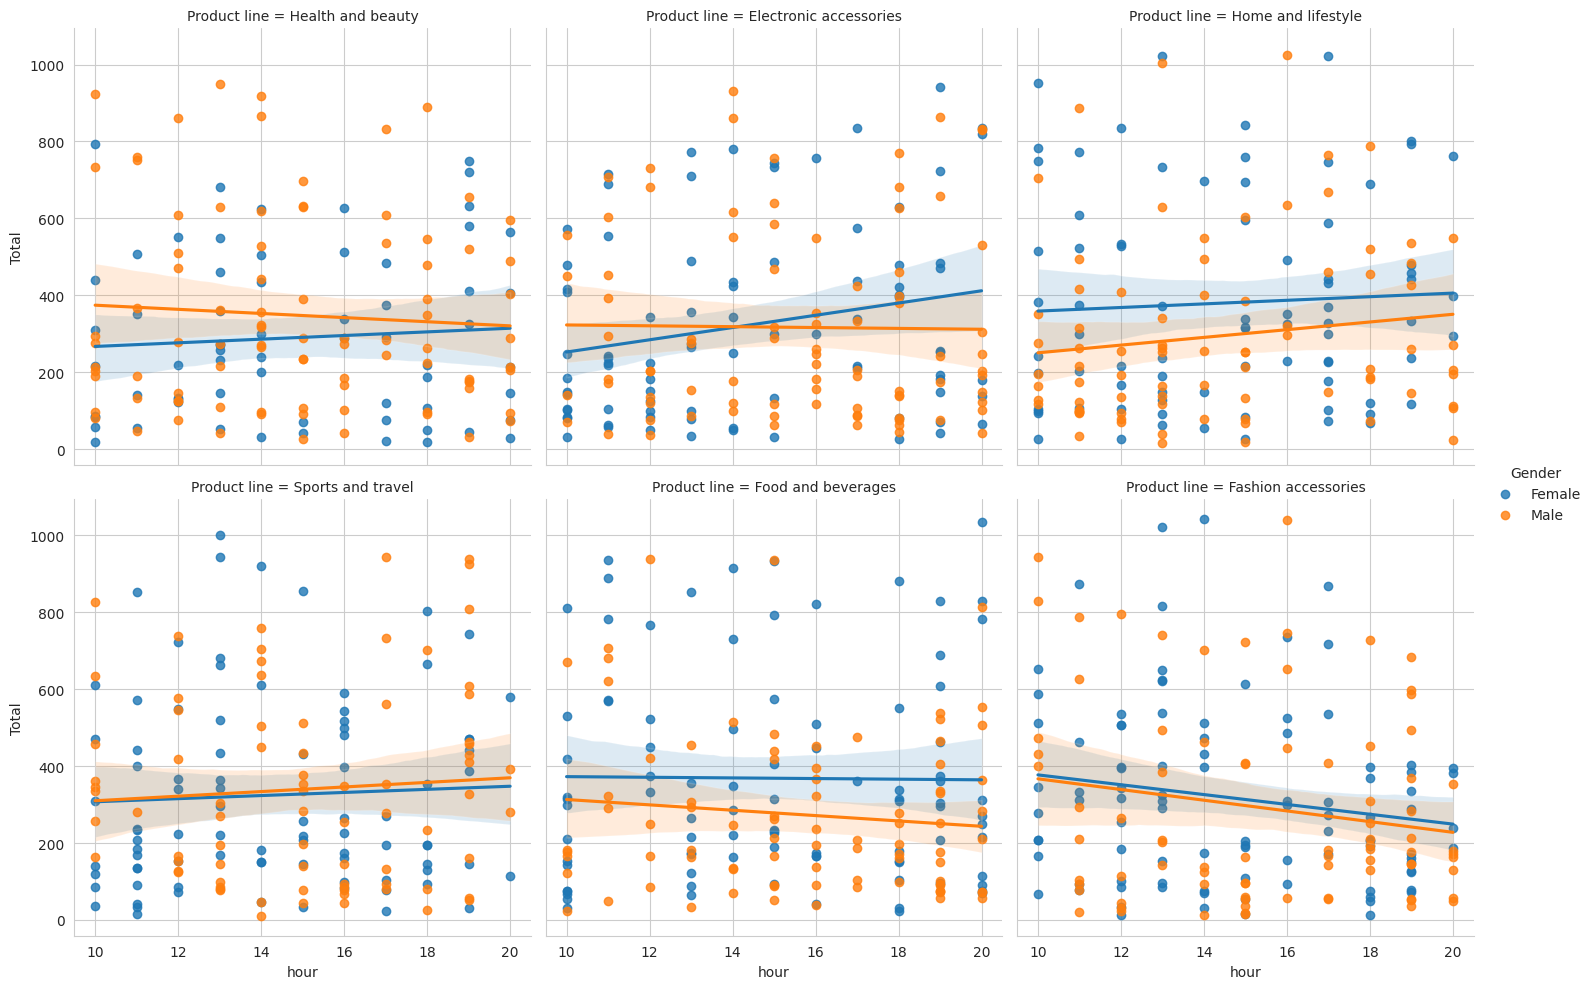

In [142]:

sns.lmplot(x='hour',
           y='Total',
           data=df, 
           hue='Gender', 
           col='Product line', 
           col_wrap=3)

#### <b>"Branch"</b>, <b>"Gender"</b>, <b>"Payment"</b>, <b>"Customer type"</b> ustunlaridagi ma'lumotlar foiz kesimida, har bir ustundagi har bir qiymat ustunda qancha foiz olishi!

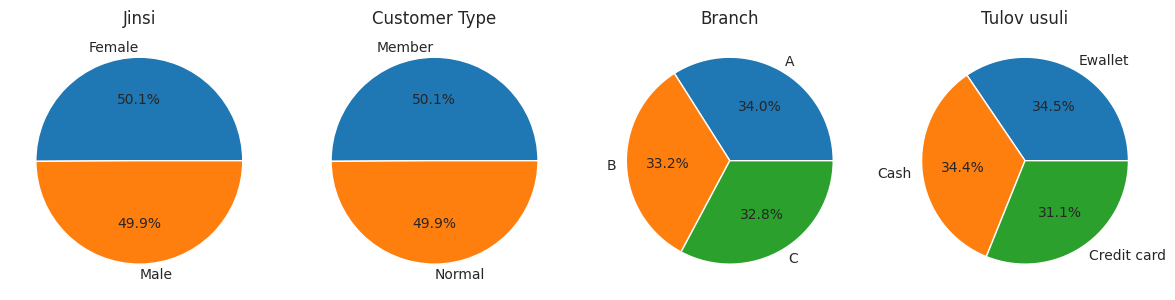

In [143]:
branch = df['Branch'].value_counts()
gender = df['Gender'].value_counts()
pay = df['Payment'].value_counts()
customer_type = df['Customer type'].value_counts()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 6))

ax1.pie(gender, labels=gender.index, autopct='%1.1f%%')
ax1.set_title('Jinsi')

ax2.pie(customer_type, labels=customer_type.index, autopct='%1.1f%%')
ax2.set_title('Customer Type')

ax3.pie(branch, labels=branch.index, autopct='%1.1f%%')
ax3.set_title('Branch')

ax4.pie(pay, labels=pay.index, autopct='%1.1f%%')
ax4.set_title('Tulov usuli')

plt.tight_layout()
plt.show()

#### Turliy <b>"Product line"</b> buyicha har bir ma'lumot soni

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

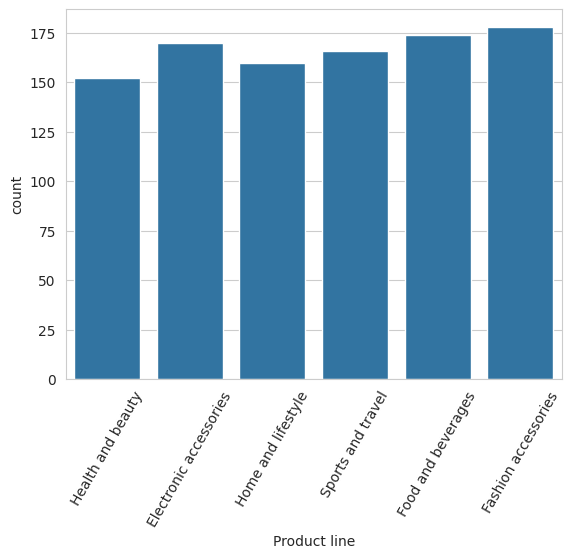

In [144]:
sns.countplot(x='Product line', data=df)
plt.xticks(rotation=60)

##### <b>"Product line"</b> ning <b>"Total"</b> buyicha urtacha qiymatlari

/tmp/ipykernel_60216/2705344631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y='Total', data=grouped, palette='gist_rainbow_r', ax=ax)
/tmp/ipykernel_60216/2705344631.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.ylim(int(grouped.min())-20, int(grouped.max())+20)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Fashion accessories'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Sports and travel'),
  Text(5, 0, 'Home and lifestyle')])

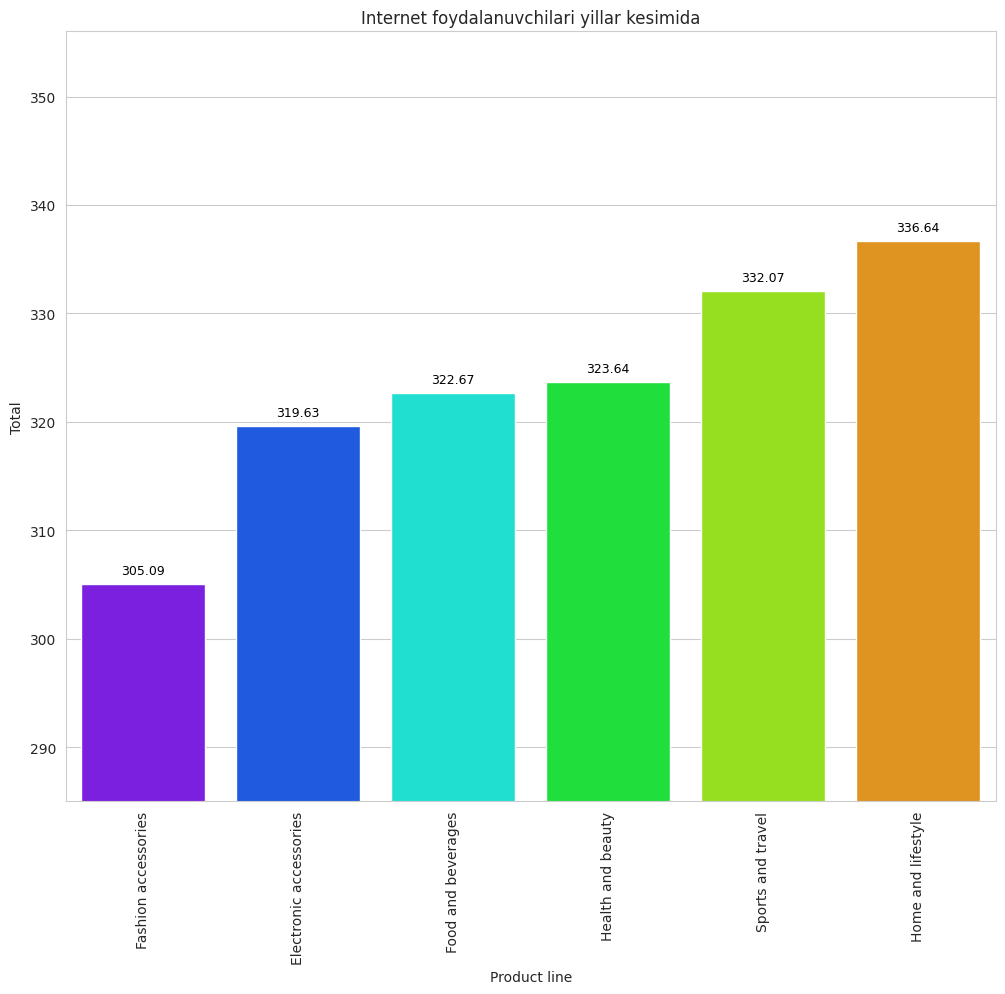

In [145]:
grouped =df.groupby('Product line').agg({'Total': 'mean'}).sort_values('Total')

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x=grouped.index, y='Total', data=grouped, palette='gist_rainbow_r', ax=ax)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
plt.title('Internet foydalanuvchilari yillar kesimida')
plt.ylim(int(grouped.min())-20, int(grouped.max())+20)
plt.xticks(rotation=90)

#### <b>"Date"</b> ustunidan <b>"Week"</b> va <b>"Month"</b> ustunlarini yaratamiz, <b>"Total"</b> ustunining oylar va hafta kunlari buyicha urtacha qiymatini aniqalymiz, Datasetimizda faqat 3-ta oy mavjud ekan

/tmp/ipykernel_60216/940625655.py:20: FutureWarning: using <class 'int'> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['int-rating'] = df['Rating'].agg(int)
/tmp/ipykernel_60216/940625655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sns.barplot(x=data.index, y=y, data=data, palette='gist_rainbow_r', ax=ax)
/tmp/ipykernel_60216/940625655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sns.barplot(x=data.index, y=y, data=data, palette='gist_rainbow_r', ax=ax)
/tmp/ipykernel_60216/940625655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

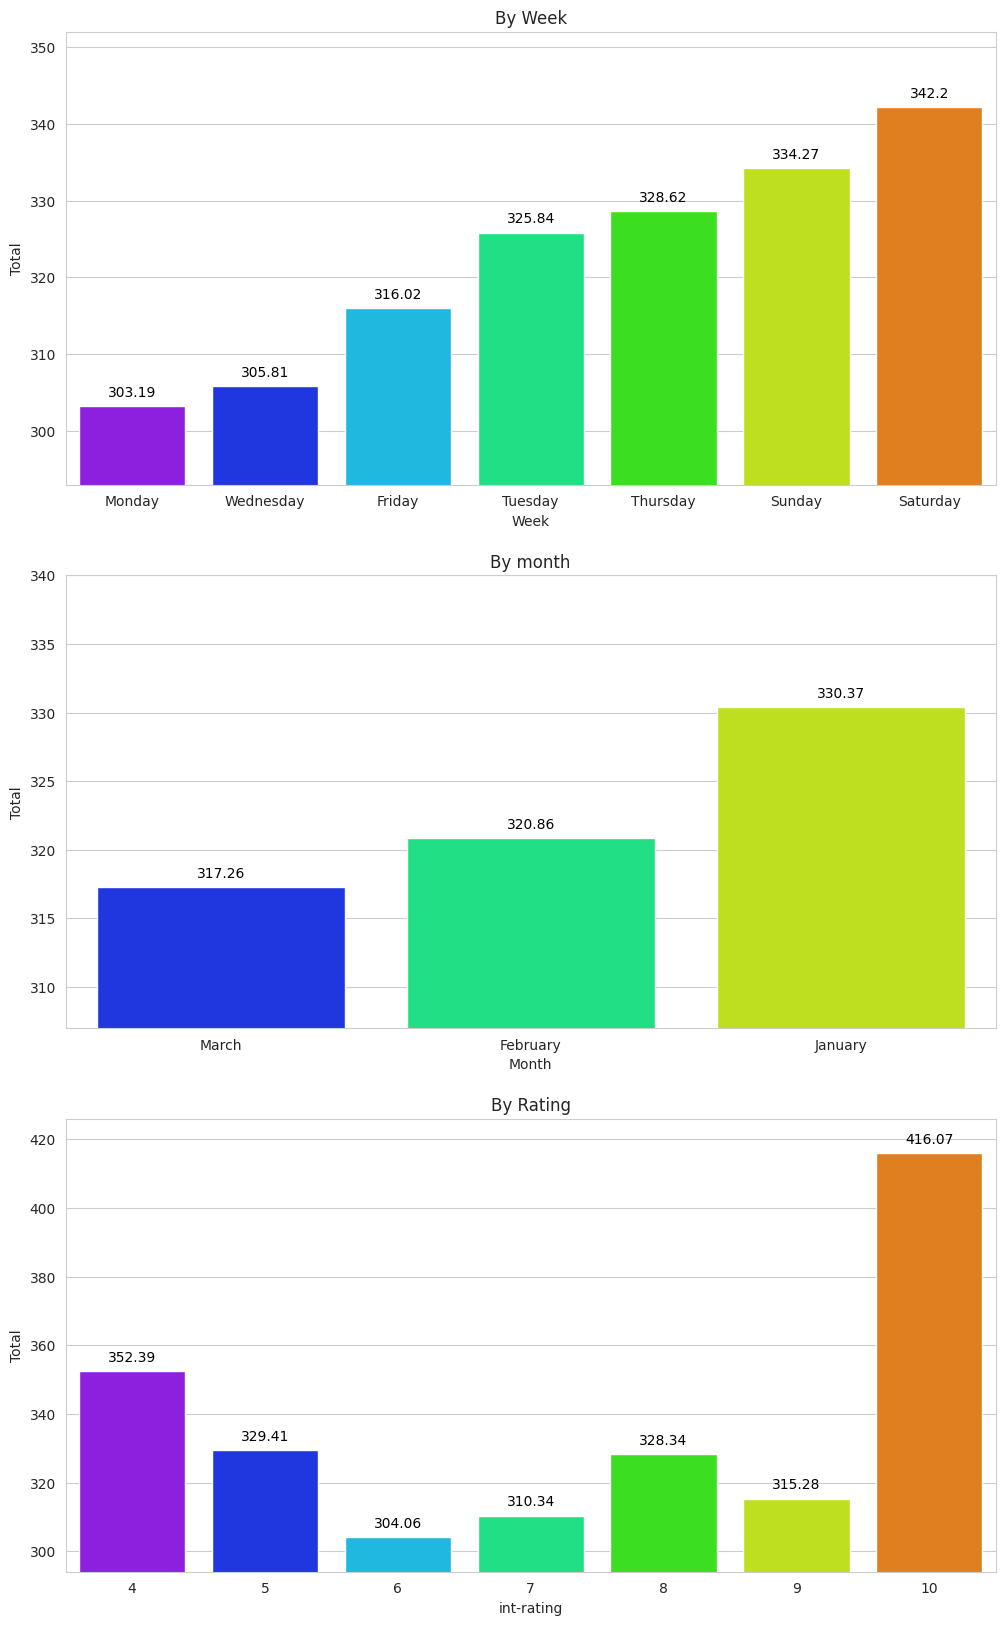

In [146]:
def df_groupby(by: str, agg={'Total': 'mean'}, sort_by='Total'):
    return df.groupby(by).agg(agg).sort_values(sort_by)

def sns_barplot(data, ax, y='Total'):
    return sns.barplot(x=data.index, y=y, data=data, palette='gist_rainbow_r', ax=ax)

def patches(ax):
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height(), 2)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
def set_title_and_ylim(ax, data, title):
    ax.set_title(title)
    ax.set_ylim(int(data.min()-10), int(data.max()+10))

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['int-rating'] = df['Rating'].agg(int)

week = df_groupby('Week')
month = df_groupby('Month')
rating = df_groupby('int-rating')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))

sns_barplot(week, ax0)
sns_barplot(month, ax1)
sns_barplot(rating, ax2)

patches(ax0)
patches(ax1)
patches(ax2)

set_title_and_ylim(ax0, week, 'By Week')
set_title_and_ylim(ax1, month, 'By month')
set_title_and_ylim(ax2, rating, 'By Rating')

#### Standard chetlanish blan kuramiz

/tmp/ipykernel_60216/3842486777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,
/tmp/ipykernel_60216/3842486777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,
/tmp/ipykernel_60216/3842486777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,


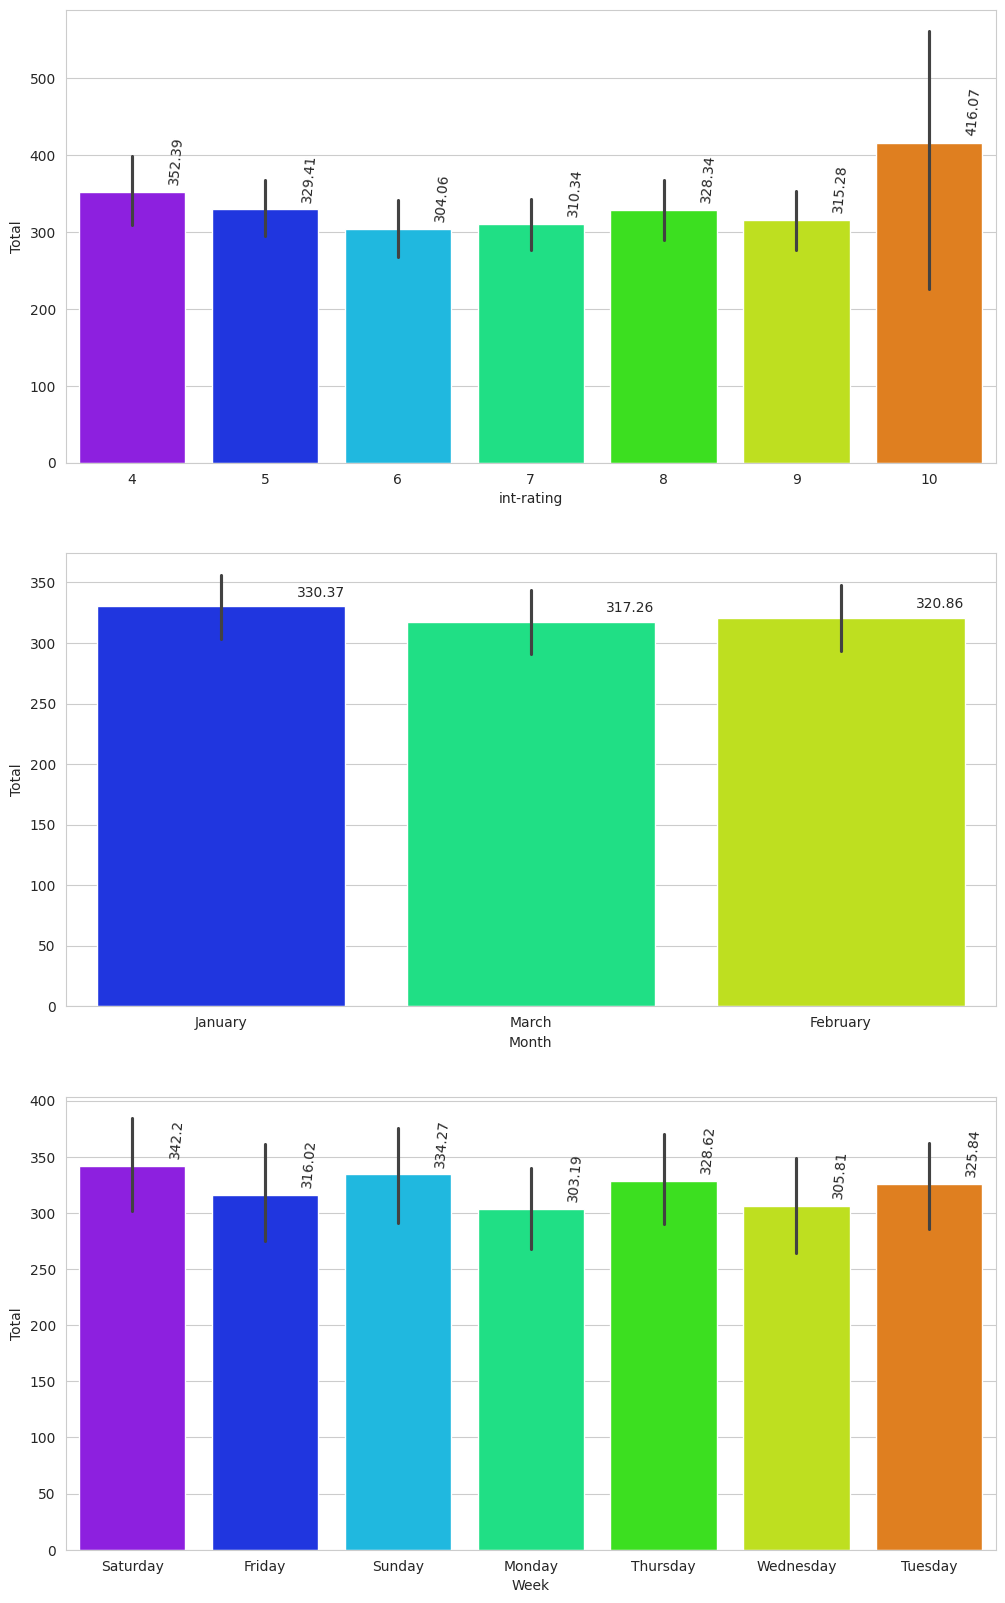

In [147]:

def bar(ax, x, data, y='Total'):
    sns.barplot(x=x, 
                y=y, 
                data=data,
                ax=ax,
                palette='gist_rainbow_r')
    

def annotate(ax, rotation=85):
    for p in ax.patches:
        ax.annotate(round(p.get_height(), 2),
                    (p.get_x() + p.get_width(), p.get_height()),
                    ha='right', 
                    va='bottom', 
                    fontsize=10, 
                    xytext=(0, 5),
                    textcoords='offset points',
                    rotation=rotation)

gruped_rating = df.groupby('int-rating')['Total'].agg(['mean', 'std'])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))

bar(ax0, 'int-rating', df)
bar(ax1, 'Month', df)
bar(ax2, 'Week', df)
annotate(ax0)
annotate(ax1, 0)
annotate(ax2)